In [1]:
# importing the required modules
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

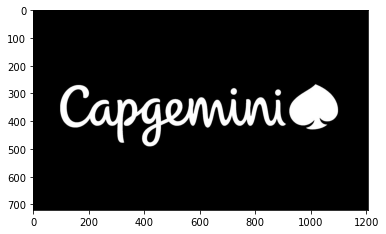

In [2]:
# reading and plotting image
img = cv.imread('CapgeminiLogo.png',0)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

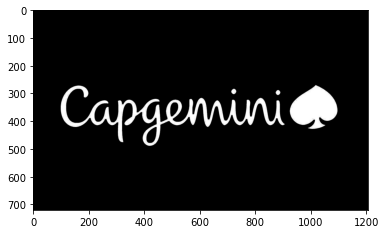

In [3]:
# creating a kernel of 5x5 size with all entries as 1's
kernel = np.ones((5,5),np.uint8)

# default erosion method
erosion = cv.erode(img,kernel,iterations = 1)
plt.imshow(cv.cvtColor(erosion, cv.COLOR_BGR2RGB))

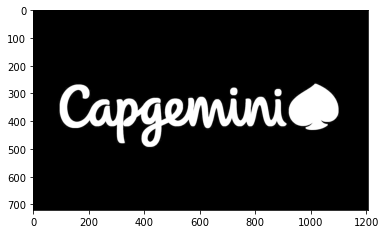

In [4]:
# default dilation method
dilation = cv.dilate(img,kernel,iterations = 1)
plt.imshow(cv.cvtColor(dilation, cv.COLOR_BGR2RGB))

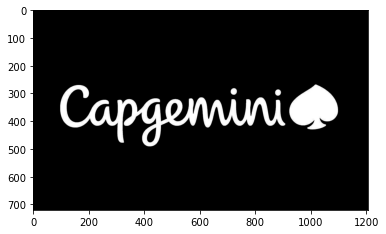

In [5]:
# default opening method
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel, iterations=1)
plt.imshow(cv.cvtColor(opening, cv.COLOR_BGR2RGB))

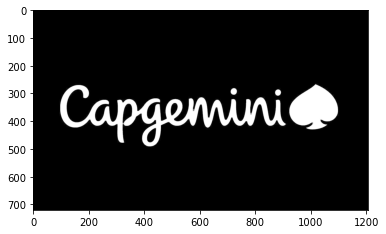

In [6]:
# default closing method
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel, iterations=1)
plt.imshow(cv.cvtColor(closing, cv.COLOR_BGR2RGB))

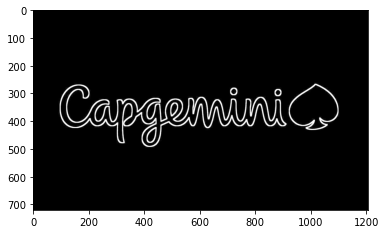

In [7]:
# default gradient method
morph = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel, iterations=1)
plt.imshow(cv.cvtColor(morph, cv.COLOR_BGR2RGB))

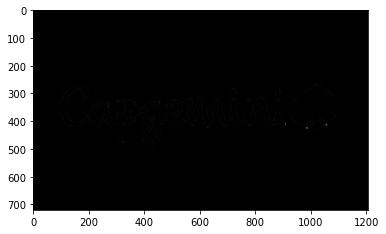

In [8]:
# default tophat method
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
plt.imshow(cv.cvtColor(tophat, cv.COLOR_BGR2RGB))

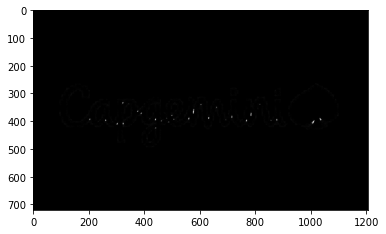

In [9]:
# default blackhat method
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
plt.imshow(cv.cvtColor(blackhat, cv.COLOR_BGR2RGB))

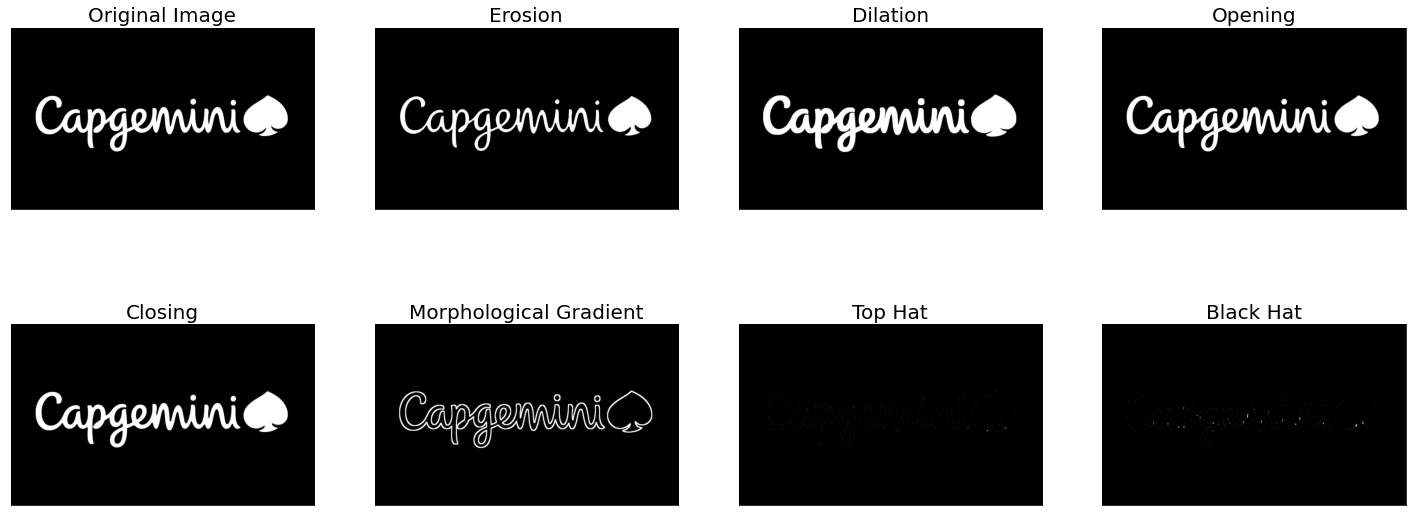

In [10]:
# plotting all the default methods for comparision

titles = ['Original Image','Erosion','Dilation','Opening','Closing','Morphological Gradient', 'Top Hat', 'Black Hat']
images = [img, erosion, dilation, opening, closing, morph, tophat, blackhat]

plt.figure(figsize=(25,10))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i], fontsize = 20)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
# Custom implementation of Dilation 


# getting the image height and width of image and kernel
h, w = img.shape

kernel = np.ones((5,5),np.uint8)

kh, kw = kernel.shape

# creating a black image to store the output
blk_img = img.copy()
blk_img[:,:] = 0

# iterating through the image dimensions to get every pixel value
for i in range(h):
    for j in range(w):
        
        # tweaking the bright pixel 
        if img[i,j]==255:
            
            # iterating through the kernel dimensions
            for k in range(kh):
                for l in range(kw):
                    
                    # tweaking the maximum of kernel
                    if kernel[k,l]==1:
                        
                        # storing all the values back to dark image
                        # and then making them as bright values
                        blk_img[i+k,j+l]=255

In [ ]:
# plotting custom dilation

plt.imshow(blk_img, 'gray')
plt.title('Custom Dilation')

In [ ]:
# custom implementation of Erosion

# getting the image height and width of image and kernel
h1, w1 = img.shape

kernel1 = np.ones((5,5),np.uint8)

kh1, kw1 = kernel1.shape

# creating a black image to store the output
blk_img1 = img.copy()
blk_img1[:,:] = 0

# iterating through the image dimensions to get every pixel value
for i1 in range(h1):
    for j1 in range(w1):
        
        # tweaking the dark pixel
        if img[i1,j1]==0:
            
            # iterating through the kernel dimensions
            for k1 in range(kh1):
                for l1 in range(kw1):
                    
                    # tweaking the maximum of kernel
                    if kernel1[k1,l1]==1:
                        
                        # storing all the values back to dark image
                        # and then making them as bright values
                        blk_img1[i1-k1,j1-l1]=255

In [ ]:
# plotting custom erosion

plt.imshow(~blk_img1, 'gray')
plt.title('Custom Erosion')

In [14]:
# converting image back to gray scale

img1 = cv.cvtColor(cv.imread('CapgeminiLogo.png'), cv.COLOR_BGR2GRAY)
kernel1 = np.ones((5,5),np.uint8)

In [15]:
# defined custom_dilation function for calculating opening, 
# closing and morphological operations

def custom_dilation(image, kernel):
    
    h, w = image.shape
    kh, kw = kernel.shape

    blk_img = image.copy()
    blk_img[:,:] = 0

    for i in range(h):
        for j in range(w):
        
            if image[i,j] == 255:
            
                for k in range(kh):
                    for l in range(kw):
                    
                        if kernel[k,l] == 1:
                
                            blk_img[i+k,j+l] = 255
                    
                    
    return blk_img               

In [16]:
# custom dilation result

y = custom_dilation(img1, kernel1)

In [17]:
# defined custom_erosion function for calculating opening, 
# closing and morphological operations

def custom_erosion(image, kernel):
    
    h, w = image.shape
    kh, kw = kernel.shape

    blk_img = image.copy()
    blk_img[:,:] = 0

    for i in range(h):
        for j in range(w):
        
            if image[i,j] == 0:
            
                for k in range(kh):
                    for l in range(kw):
                    
                        if kernel[k,l] == 1:
                
                            blk_img[i-k,j-l] = 255
                    
                    
    return ~blk_img               

In [18]:
# custom erosion output

x = custom_erosion(img1, kernel1)

In [19]:
# custom opening result
# got by doing first erosion and then dilation

custom_opening = custom_dilation(x, kernel1)

In [ ]:
plt.imshow(custom_opening, 'gray')

In [20]:
# custom closing result
# got by doing first dilation and then erosion

custom_closing = custom_erosion(y, kernel1)

In [ ]:
plt.imshow(custom_closing, 'gray')

In [ ]:
# custom tophat result

top_hat = img1 - opening
plt.imshow(top_hat, 'gray')

In [ ]:
# custom blackhat result

black_hat = closing - img1
plt.imshow(black_hat, 'gray')

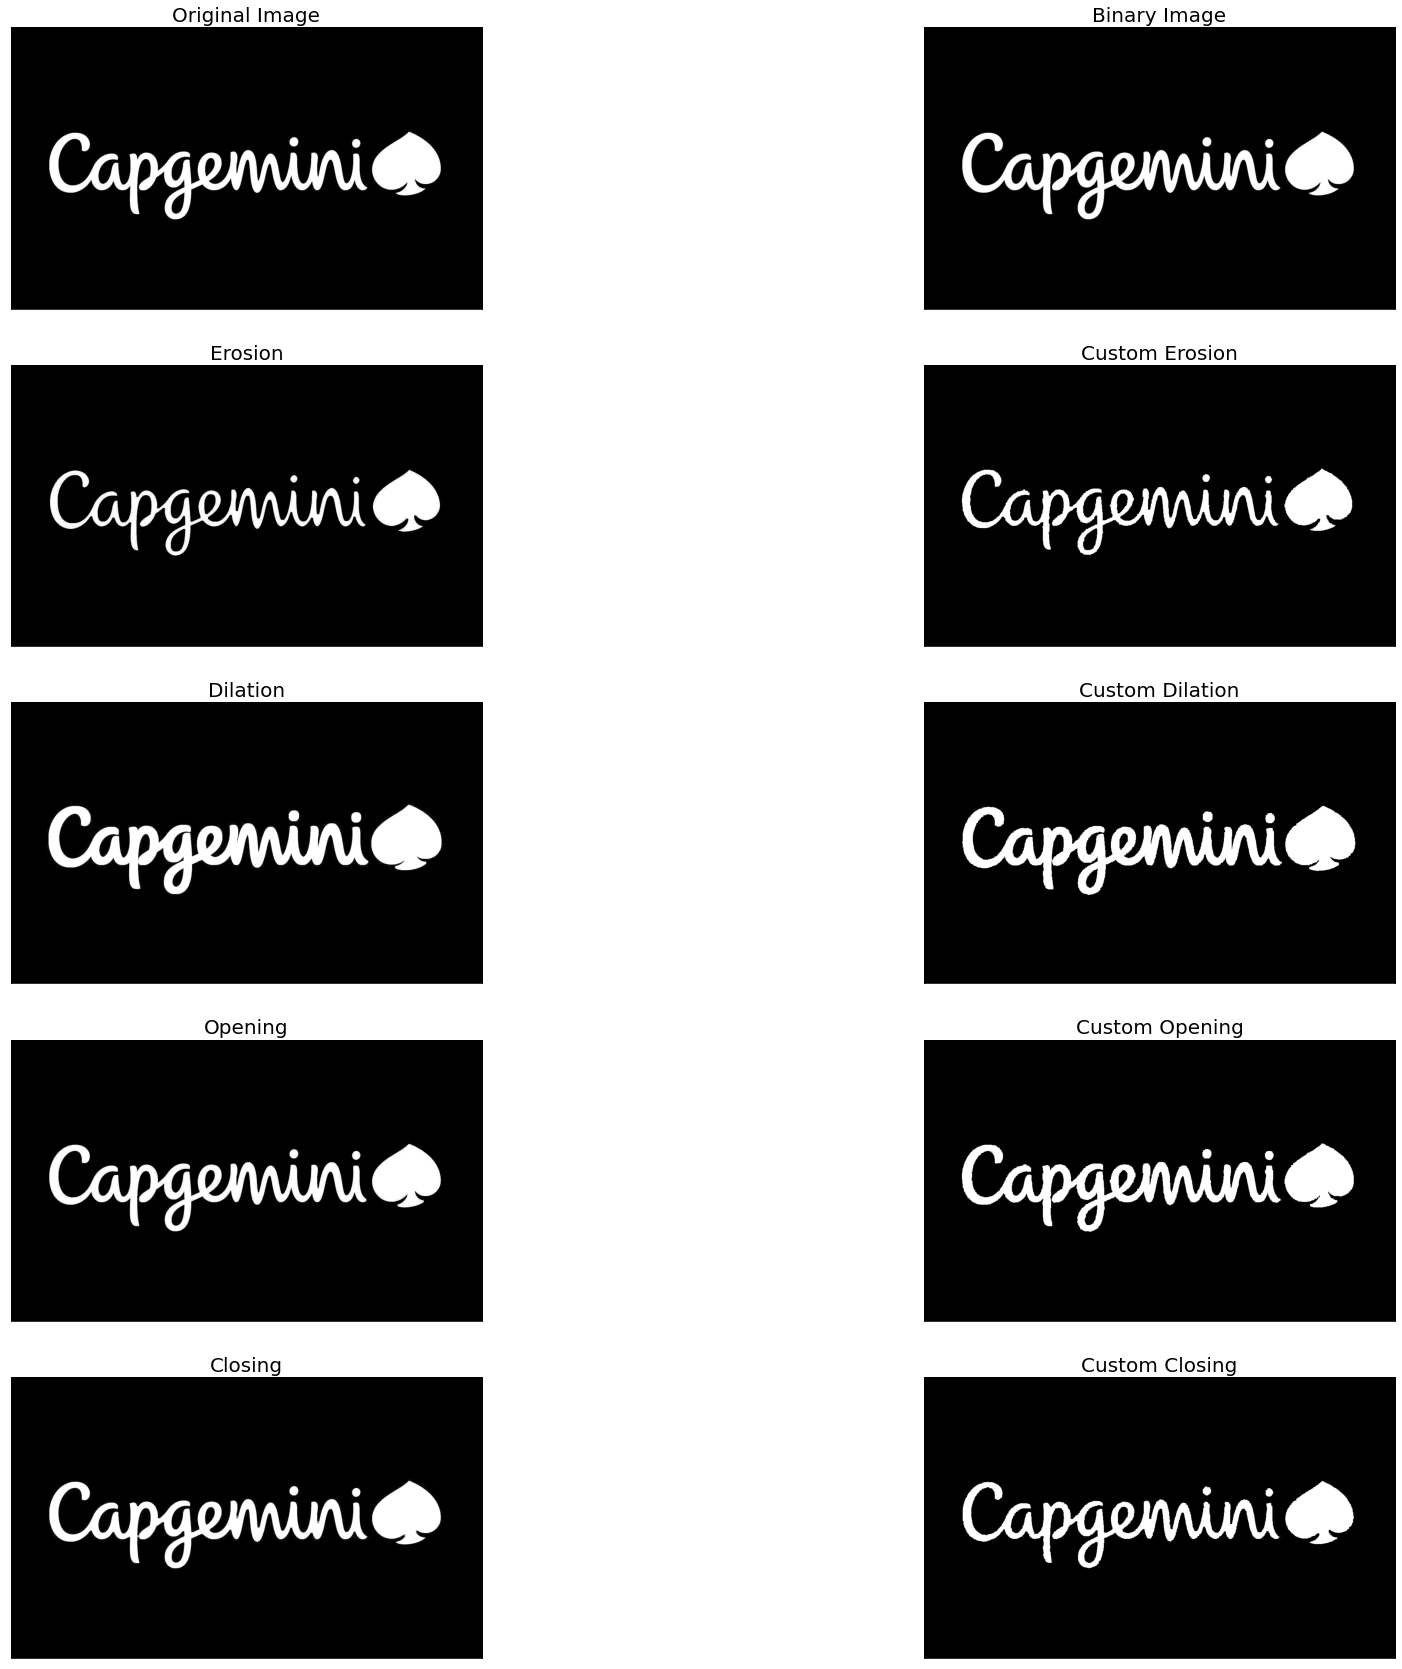

In [21]:
# plotting the required default and custom methods results for comparision

titles = ['Original Image','Binary Image', 'Erosion', 'Custom Erosion', 'Dilation', 'Custom Dilation','Opening', 'Custom Opening', 'Closing', 'Custom Closing']
images = [img, img1, erosion, x, dilation, y, opening, custom_opening, closing, custom_closing]

plt.figure(figsize=(30,30))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i], fontsize = 20)
    plt.xticks([])
    plt.yticks([])
plt.show()

 Dilation - grow image regions
            involves eroding the foreground of the image
            primarily involves eroding the foreground of the image

 Erosion - shrink image regions
           involves dilating the foreground of the image
           primarily involves expanding the foreground of the image

 Opening - structured removal of image region boundary pixels
           involves erosion followed by dilation in the foreground of the image
           generally used to remove the noise in the image

 Closing - structured filling in of image region boundary pixels 
           involves dilation followed by erosion in the foreground of the image
           generally used to remove the noise in the image
 
 Morphological Gradient - first applies erosion and dilation individually on the image and then computes the difference between   the eroded and dilated image

 Top Hat - where Opening is performed on the binary image and the output of this operation is a difference between the input     image and the opened image
 
 Black Hat - where Opening is performed on the binary image and the output of this operation is a difference between the input image and the opened image.
  